In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

*a priori* solution. The $P$ profile has strange artifacts and adaptive time-stepping doesn't work.

In [2]:
N = 64
p = 3
T = 10

apriori_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer,
        x,
        y,
        z,
        vx=1,
        bounds=(1e-6, 1),
        P=1e-6,
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (0, np.inf)},
    CFL=0.8,
    adaptive_timestepping=True,
    primitive_nodes=True,
    lazy_primitives=True,
    riemann_solver="llf",
)
apriori_solver.ssprk3(T)

100%|██████████| 10.0/10 [00:11]                


In [3]:
apriori_solver2 = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer,
        x,
        y,
        z,
        vx=1,
        bounds=(1e-6, 1),
        P=1e-6,
    ),
    nx=N,
    p=1,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (0, np.inf)},
    CFL=0.8,
    adaptive_timestepping=True,
    primitive_nodes=True,
    lazy_primitives=True,
    riemann_solver="llf",
)
apriori_solver2.ssprk2(T)

100%|██████████| 10.0/10 [00:05]                


Text(0, 0.5, 'dt')

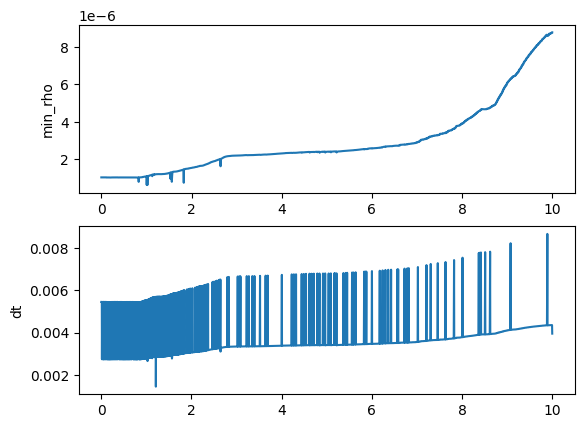

In [4]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(apriori_solver.minisnapshots["t"], apriori_solver.minisnapshots["min_rho"])
axs[0].set_ylabel("min_rho")
axs[1].plot(apriori_solver.minisnapshots["t"], apriori_solver.minisnapshots["dt"])
axs[1].set_ylabel("dt")

Text(0, 0.5, '$P$')

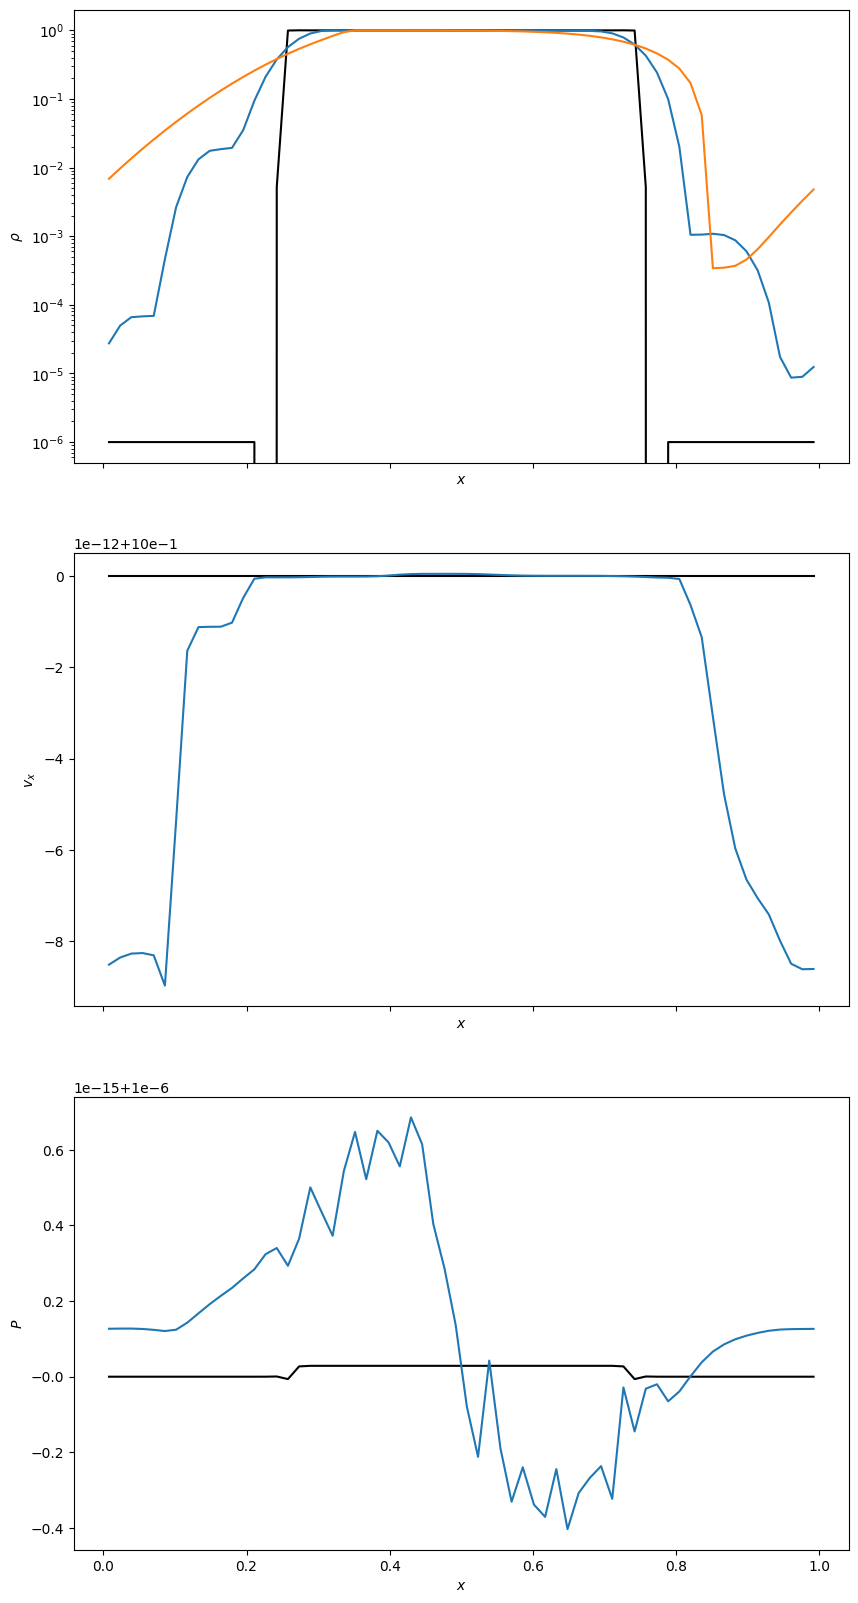

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20), sharex=True)
apriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=T)
apriori_solver2.plot_1d_slice(axs[0], "rho", array="w", x=None, t=T)
axs[0].set_ylabel(r"$\rho$")
axs[0].set_yscale("log")
apriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=T)
axs[1].set_ylabel(r"$v_x$")
apriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=T)
axs[2].set_ylabel(r"$P$")